In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt') 
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('Corona_NLP_test.csv')

# Extract the text data from a specific column
text_data = df['OriginalTweet']

In [3]:
tokenized_data = text_data.apply(lambda x: nltk.word_tokenize(x))

# Print the tokenized data
print(tokenized_data)

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [When, I, could, n't, find, hand, sanitizer, a...
2       [Find, out, how, you, can, protect, yourself, ...
3       [#, Panic, buying, hits, #, NewYork, City, as,...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, In, A, Supermarket, in, Israel, --...
3794    [Did, you, panic, buy, a, lot, of, non-perisha...
3795    [Asst, Prof, of, Economics, @, cconces, was, o...
3796    [Gov, need, to, do, somethings, instead, of, b...
3797    [I, and, @, ForestandPaper, members, are, comm...
Name: OriginalTweet, Length: 3798, dtype: object


In [4]:
stop_words = set(nltk.corpus.stopwords.words('english'))

# Tokenize and remove stop words from the text data
processed_data = text_data.apply(lambda x: [word for word in nltk.word_tokenize(x) if word.lower() not in stop_words])

# Print the processed data
print(processed_data)

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [could, n't, find, hand, sanitizer, Fred, Meye...
2       [Find, protect, loved, ones, #, coronavirus, ....
3       [#, Panic, buying, hits, #, NewYork, City, anx...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, Supermarket, Israel, --, People, d...
3794    [panic, buy, lot, non-perishable, items, ?, EC...
3795    [Asst, Prof, Economics, @, cconces, @, NBCPhil...
3796    [Gov, need, somethings, instead, biar, je, rak...
3797    [@, ForestandPaper, members, committed, safety...
Name: OriginalTweet, Length: 3798, dtype: object


In [5]:
all_words = [word for tokens in tokenized_data for word in tokens]

# Create an NLTK frequency distribution of the words
fdist = nltk.FreqDist(all_words)

# Print the most common words and their frequencies
for word, frequency in fdist.most_common(20):
    print('{}: {}'.format(word, frequency))

#: 7857
.: 4866
the: 3854
to: 3671
,: 3528
?: 2597
:: 2413
and: 2350
of: 2041
https: 1824
a: 1714
in: 1707
Covid_19: 1453
for: 1284
is: 1277
I: 1255
@: 1242
food: 1201
coronavirus: 1194
are: 1091


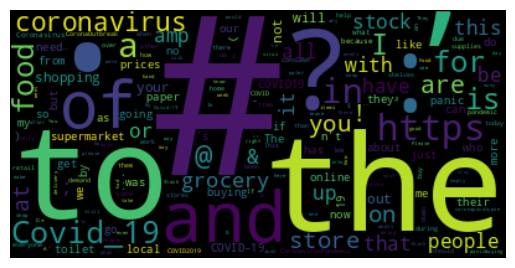

In [10]:
# Creating a word frequency distribution of the words
fdist = nltk.FreqDist(all_words)

# Generating word cloud from the word frequency distribution
wordcloud = WordCloud().generate_from_frequencies(fdist)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()